In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### we have some blank values in Total Charges - Convert it into 0

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Check Null value in dataset

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Convert SeniorCitizen column's 0 and 1 value to 'yes' or 'no'

In [9]:
def convert(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df['SeniorCitizen'] = df["SeniorCitizen"].apply(convert)

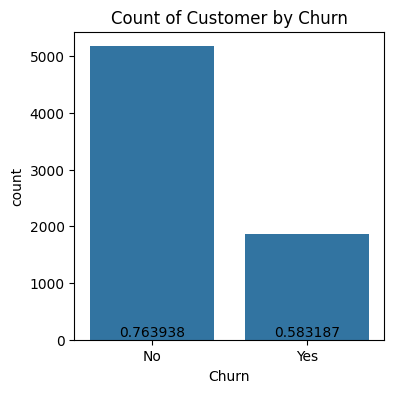

In [40]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(X.containers[0])
plt.title('Count of Customer by Churn')
plt.show()

#### from out of given Customer 1869 Customers Have Churned Out

In [41]:
grp = df.groupby('Churn').agg({'Churn' : 'count'})


#### Find Percentage of Churn - use pie chart

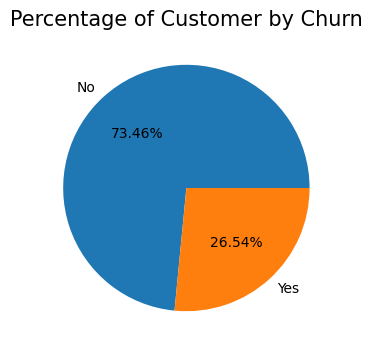

In [42]:
plt.figure(figsize = (4,4))
plt.pie(grp['Churn'], labels = grp.index, autopct = '%1.2f%%' )
plt.title('Percentage of Customer by Churn', fontsize = 15)
plt.show()

#### From the given pie chart we can conclude that 26.54% of our Customers have Churned out.

#### now explore reason behind it

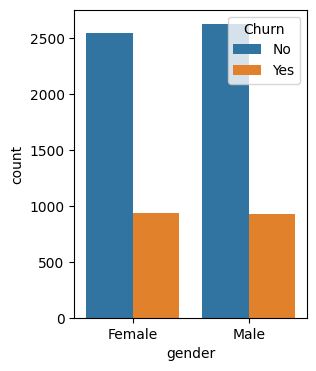

In [43]:
plt.figure(figsize = (3,4))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.show()

#### Conclusion - Gender Is not the reason for Customer by churn

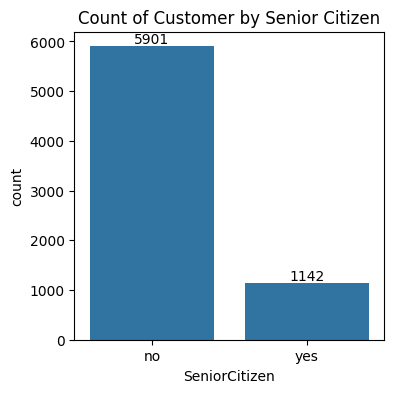

In [49]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Senior Citizen')
plt.show()

### Create Stacked bar chart

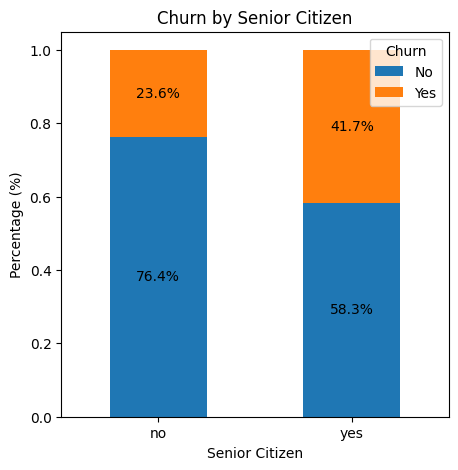

In [53]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust figure size
total_counts.plot(kind='bar', stacked=True, ax=ax)

# Add percentage label on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height * 100:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title="Churn", loc='upper right')  # Customize legend location
plt.show()

#### Comparative a greater percentage of people in senior citizen category have churned

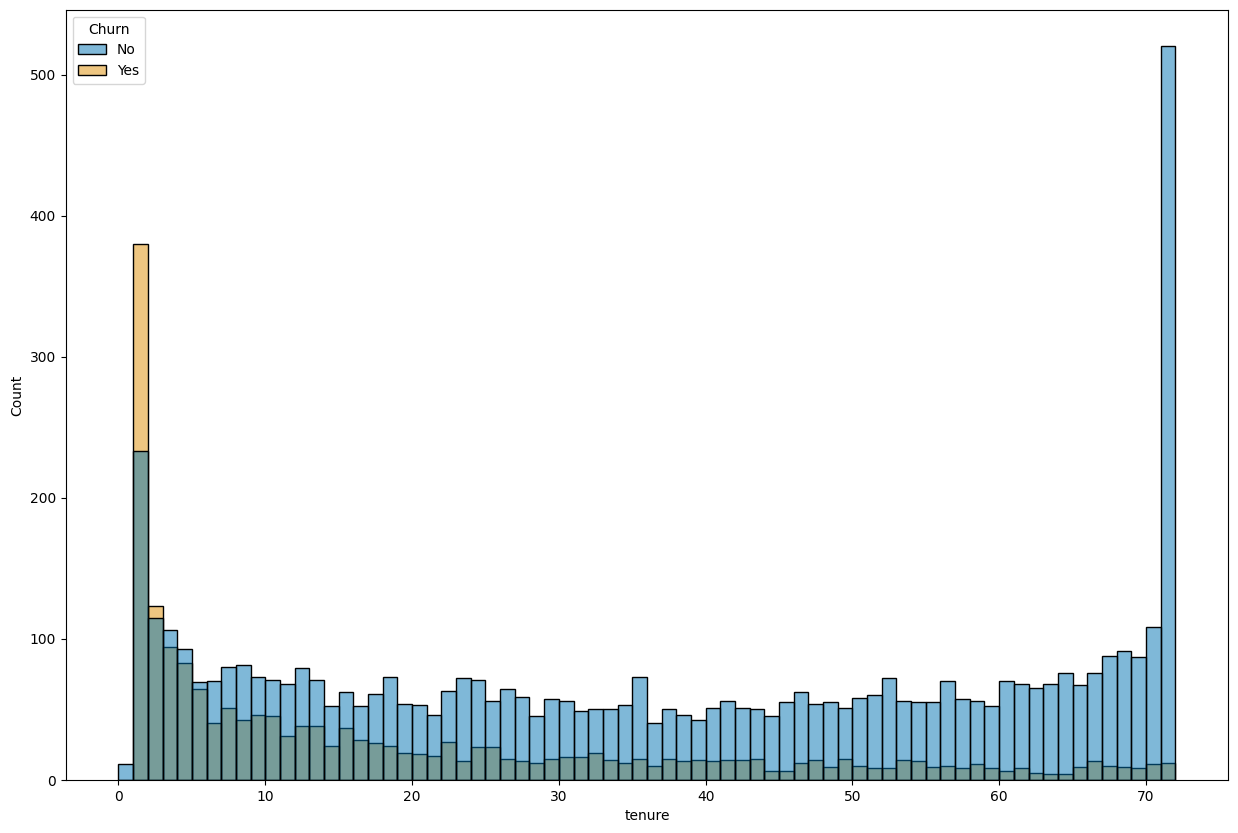

In [80]:
plt.figure(figsize = (15,10))
sns.histplot(x = 'tenure', data = df, bins = 72, hue="Churn", palette = 'colorblind')
plt.show()

#### We can observ here - people who have used services for a long time have stayed and people and who have used our services # 1 or 2 month have churned

#### Most of the people Churned Out in the initial month

#### Count of people bases on contract 

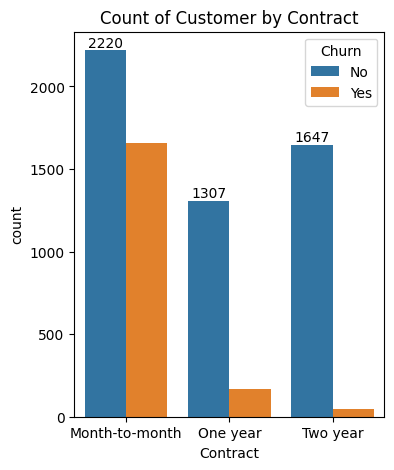

In [64]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = 'Contract', data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Contract')
plt.show()

#### People who have Month to month contract are likely more chances to Churned out .. 
#### so we can convince Customer that one year or two year plan (Contracts more Beneficial for them) 

#### Create Subplot of Remaining Columns

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


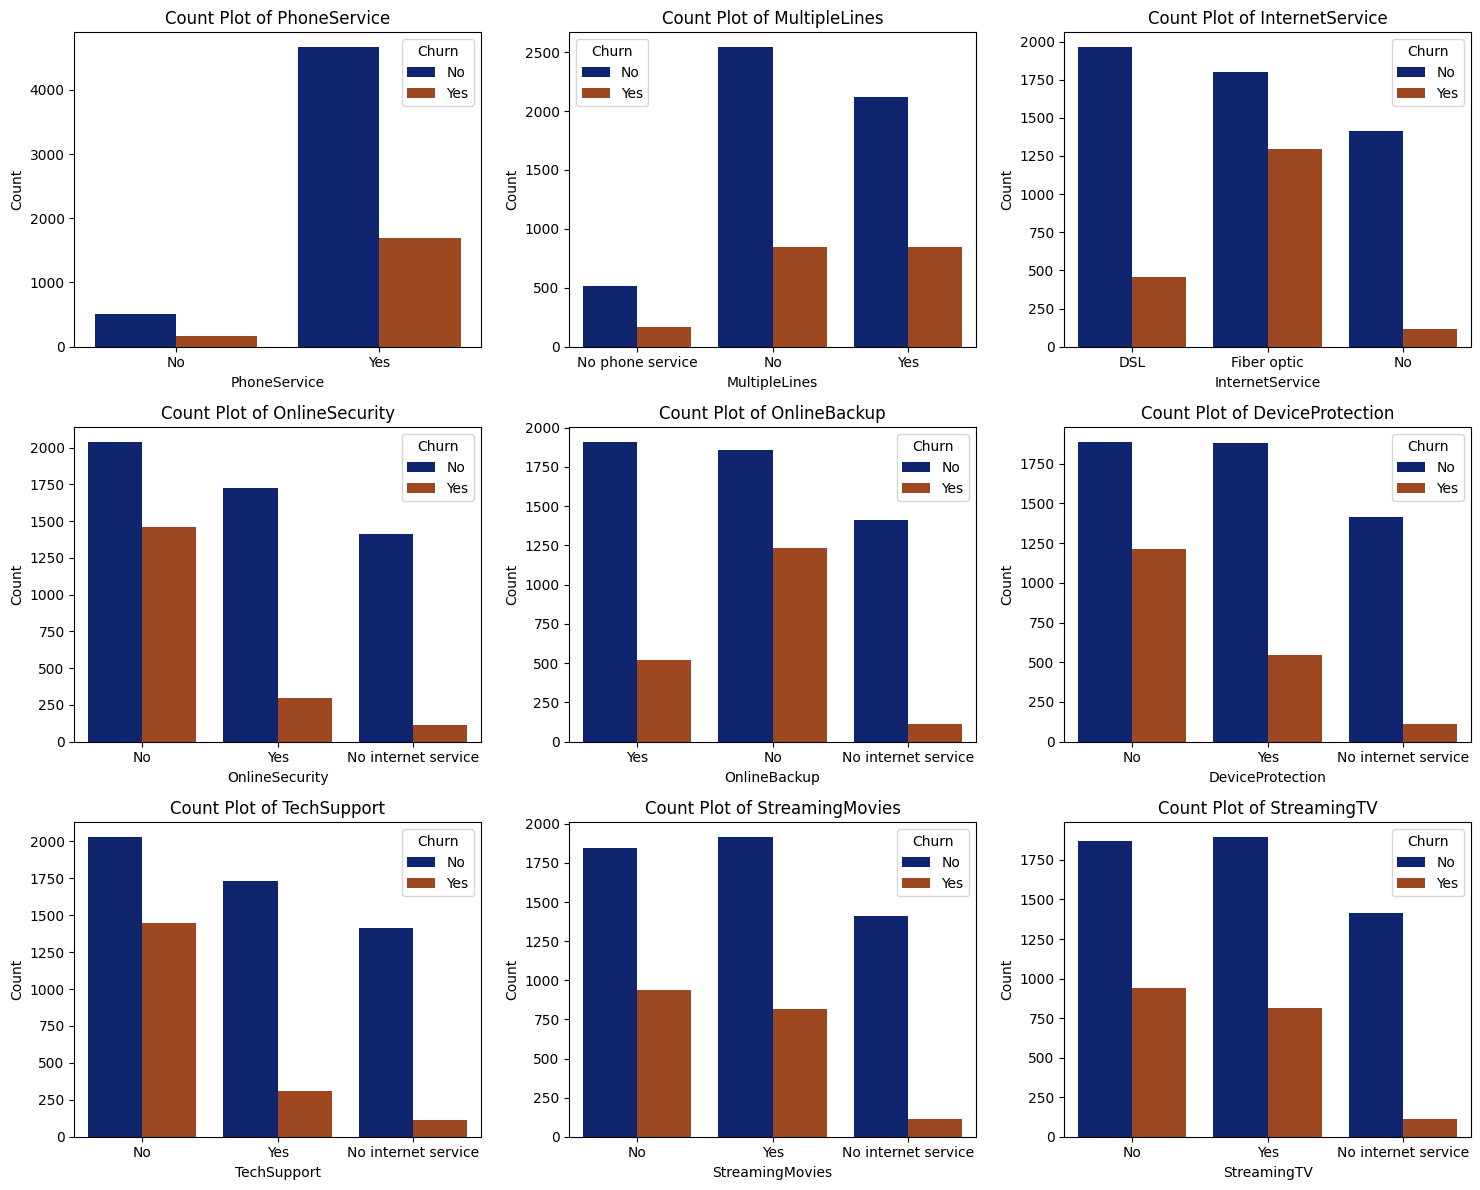

In [76]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 
           'StreamingTV']

n_col = 3  # Number of columns for the subplot grid
n_rows = (len(columns) + n_col - 1) // n_col  # Calculate number of rows needed

# Create Subplot
fig, axes = plt.subplots(n_rows, n_col, figsize=(15, n_rows * 4))  # Adjust Figure size as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn", palette='dark')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### People who are using Fiber Optic likely churning also who are using multiplelines they are aslo churning 

#### Count of Customer by Payment method

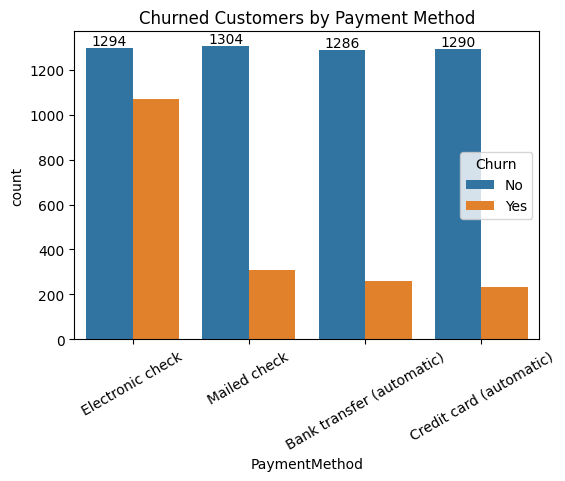

In [84]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title('Churned Customers by Payment Method')
plt.xticks(rotation = 30)
plt.show()

#### Customer is likely Churning out when they are using Electronic check for payment